In [1]:
import matplotlib.pyplot as plt
from simulate_reads import random_reads_in_interval, generate_isoform_aware_density, Isoform

INFO:helper:Reading bamfile...
INFO:helper:Done reading bamfile ../AitkenLab/rnaseq_all.bam
INFO:helper:Reading bedfile...
INFO:helper:Done reading bedfile ../indexes/yeast-all.bed
INFO:helper:Processed TIFs in chromosome 1...
INFO:helper:Processed TIFs in chromosome 2...
INFO:helper:Processed TIFs in chromosome 3...
INFO:helper:Processed TIFs in chromosome 4...
INFO:helper:Processed TIFs in chromosome 5...
INFO:helper:Processed TIFs in chromosome 6...
INFO:helper:Processed TIFs in chromosome 7...
INFO:helper:Processed TIFs in chromosome 8...
INFO:helper:Processed TIFs in chromosome 9...
INFO:helper:Processed TIFs in chromosome 10...
INFO:helper:Processed TIFs in chromosome 11...
INFO:helper:Processed TIFs in chromosome 12...
INFO:helper:Processed TIFs in chromosome 13...
INFO:helper:Processed TIFs in chromosome 14...
INFO:helper:Processed TIFs in chromosome 15...
INFO:helper:Processed TIFs in chromosome 16...
INFO:helper:Done reading TIF file... returning a dictionary
INFO:helper:Read

In [2]:
import matplotlib

In [3]:
from matplotlib.patches import Rectangle
import numpy as np

In [4]:
from helper import __generate_read_density, make_metagene_plot

In [5]:
np.random.seed(527)

In [6]:
reads = random_reads_in_interval(100, 200, 15, 30)
reads


In [7]:
density,_ = __generate_read_density(reads)
density[100] = density[200] = 0
len(density)
density = density + [0] * 8

INFO:helper:len(reads)=17
INFO:helper:chrom_size=200
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 467


In [8]:
save_to_pgf = False


In [9]:
if save_to_pgf: 
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

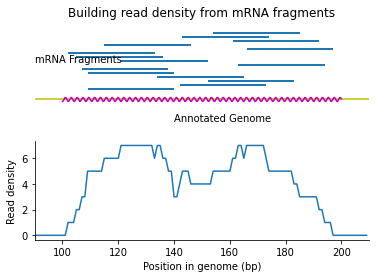

In [10]:
fig, ax = plt.subplots(2)


ax[0].set_title("Building read density from mRNA fragments")

ax[0].axis("off")
ax[0].set_xlim([90, 210])
ax[0].set_ylim([-10,40])
ax[0].plot()
for i in range(0, len(reads) - 2):
    ax[0].add_patch(Rectangle((reads[i].reference_start, 5 + 2*i + 1), reads[i].reference_end - reads[i].reference_start + 1, 1))

ax[0].axhline(y=1, color='y', linestyle='-')

gene_x = np.arange(100, 200, 0.1)
gene_y = 1 + np.sin(gene_x * 3)
ax[0].plot(gene_x, gene_y, color='m')
ax[0].text(140, -10, "Annotated Genome")

ax[0].text(90, 20, "mRNA Fragments")

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xlim([90, 210])
ax[1].set_xlabel("Position in genome (bp)")
ax[1].set_ylabel("Read density")
ax[1].plot(density)


#plt.savefig("read_density.pgf")
plt.show()

plt.close()

In [11]:
isoforms2 = [Isoform(1000, 2000), Isoform(1200, 2000)]
prob2 = [0.4, 0.6]

density = generate_isoform_aware_density(isoforms2, prob2, 200, read_length=44, plot=False)


INFO:helper:len(reads)=82
INFO:helper:chrom_size=2000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 3602
INFO:helper:len(reads)=122
INFO:helper:chrom_size=2000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 5402


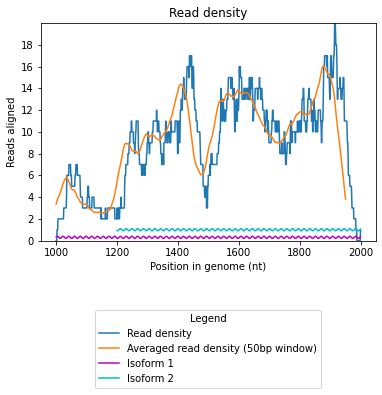

In [12]:
moving_avg = np.convolve(density, np.ones(50)/50, mode='valid')

plt.plot(range(1000,2001), density, label="Read density")
plt.plot(range(1000, 2002-50), moving_avg, label="Averaged read density (50bp window)")

plt.ylim(0,20)
plt.yticks(range(0,20,2))
plt.ylabel("Reads aligned")
plt.xlabel("Position in genome (nt)")
plt.title("Read density")

gene_x = np.arange(1000, 2000, 0.1)
gene_y = 0.3 + np.sin(gene_x / 3) / 10
plt.plot(gene_x, gene_y, color='m', label="Isoform 1")



gene_x = np.arange(1200, 2000, 0.1)
gene_y = 1 + np.sin(gene_x / 3) / 10
plt.plot(gene_x, gene_y, color='c', label="Isoform 2")
plt.legend(title="Legend", bbox_to_anchor=(0.5,-0.7), loc="lower center")

if save_to_pgf:
    plt.savefig("two-isoform.pgf", bbox_inches='tight')
else:
    plt.show()
    
plt.close()

In [13]:
isoforms = [Isoform(2500, 3500), Isoform(2800, 3500)]
prob = [0.7, 0.3]


isoforms2 = [Isoform(1000, 2000), Isoform(1200, 2000)]
prob2 = [0.4, 0.6]

isoforms3 = [Isoform(4000, 5000), Isoform(4350, 5000)]
prob3 = [0.9, 0.1]


reads1 = generate_isoform_aware_density(isoforms, prob, 300, read_length=44, plot=False)
reads2 = generate_isoform_aware_density(isoforms2, prob2, 200, read_length=44, plot=False)
reads3 = generate_isoform_aware_density(isoforms3, prob3, 400, read_length=44, plot=False)




INFO:helper:len(reads)=212
INFO:helper:chrom_size=3500
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 9452
INFO:helper:len(reads)=92
INFO:helper:chrom_size=3500
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 4052
INFO:helper:len(reads)=82
INFO:helper:chrom_size=2000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 3602
INFO:helper:len(reads)=122
INFO:helper:chrom_size=2000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 5402
INFO:helper:len(reads)=362
INFO:helper:chrom_size=5000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 16202
INFO:helper:len(reads)=42
INFO:helper:chrom_size=5000
INFO:helper:Done generating read density...
INFO:helper:Sum of density_n: 0
INFO:helper:Sum of density_p: 1802


In [14]:
density = [0]*1000 + reads2 + [0] * 499 + reads1 + [0] * 499 + reads3
print(len(density))
meta = make_metagene_plot((density,[]), [(1200, "+"), (2800, "+"), (4300,"+")], "", 50, 50, plot=False)

INFO:helper:Generating metagene plot... Number of overlapping sites is: 3
INFO:helper:<class 'tuple'>
INFO:helper:type of splits[0] is <class 'tuple'>
INFO:helper:(1200, '+')


5001


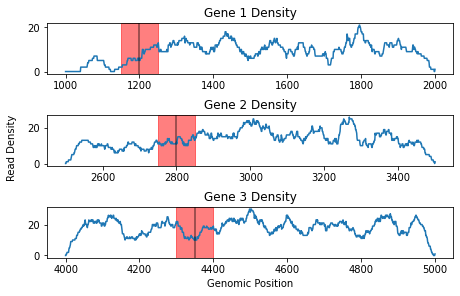

In [15]:
fig, ax = plt.subplots(3, constrained_layout=True)

ax[1].plot(range(2500,3501), reads1)
ax[0].plot(range(1000,2001), reads2)
ax[2].plot(range(4000,5001), reads3)


ax[0].axvspan(1150, 1250, alpha=0.5, color='red')
ax[0].axvline(1200, color='k', alpha=0.5)
ax[1].axvspan(2750, 2850, alpha=0.5, color='red')
ax[1].axvline(2800, color='k', alpha=0.5)
ax[2].axvspan(4300, 4400, alpha=0.5, color='red')
ax[2].axvline(4350, color='k', alpha=0.5)

#ax[0].set_xlabel("Genomic Position")
#ax[1].set_xlabel("Genomic Position")
ax[2].set_xlabel("Genomic Position")

ax[0].set_title("Gene 1 Density")

ax[1].set_title("Gene 2 Density")

ax[2].set_title("Gene 3 Density")


fig.text(-0.04, 0.5, 'Read Density', va='center', rotation='vertical')

#ax[0].set_ylabel("Density",rotation=45)
#ax[1].set_ylabel("Density",rotation=45)
#ax[2].set_ylabel("Density",rotation=45)




#fig.tight_layout()
if not save_to_pgf:
    plt.show()
else:
    plt.savefig("isoform_junction.pgf", bbox_inches='tight')
    
plt.close()

In [16]:
tifs = 


NameError: name 'tifs' is not defined